<a href="https://colab.research.google.com/github/PapaJacque16/MLA_AMM/blob/main/MLA1_AMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Machine Learning Assignment 1
###Aaron McCarley
###CS430-ON
###Machine Learning in the Cloud

###Importing Libraries/Packages

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

###Connect to Google Drive

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Using a data set known as weather_2012

In [72]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

In [73]:
#first five rows
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [74]:
#last five rows
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [75]:
#sample of five random rows
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
7811,2012-11-21 11:00:00,6.3,-0.3,63,4,19.3,101.93,Mainly Clear
6461,2012-09-26 05:00:00,15.1,9.2,68,17,25.0,100.84,Mostly Cloudy
2506,2012-04-14 10:00:00,12.8,-0.2,41,26,48.3,101.38,Cloudy
8144,2012-12-05 08:00:00,4.2,-0.5,71,26,24.1,100.85,Cloudy
4779,2012-07-18 03:00:00,19.3,17.2,88,9,25.0,100.33,Clear


In [76]:
#Display a list of all of the columns in the dataset
df[['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather']]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [77]:
#Renamed the columns to list {date_time, temp_c, dew_point, relative_humidity, wind_speed, visibility, pressure, and weather}.
df.rename(columns={'Date/Time':'date_time', 'Temp (C)':'temp_c', 'Dew Point Temp (C)':'dew_point', 'Rel Hum (%)':'relative-humidity', 'Wind Spd (km/h)':'wind-speed', 'Visibility (km)':'visibility', 'Stn Press (kPa)':'pressure', 'Weather':'weather'},inplace=True)

In [78]:
#Some standard statistics for each column
df.describe()

,temp_c,dew_point,relative-humidity,wind-speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [79]:
#Assign new column to a DataFrame. Then equate Fahrenheit from Celsius in the new column
df = df.assign(temp_f = lambda x: (9/5)*x['temp_c']+32 )
df

,date_time,temp_c,dew_point,relative-humidity,wind-speed,visibility,pressure,weather,temp_f
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,32.18
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,32.36
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,31.10
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,31.64


In [80]:
#Write the code to rearrange the columns in the dataset so temp_f appears immediately before temp_c.
cols = ['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative-humidity', 'wind-speed', 'visibility', 'pressure', 'weather']
df = df[cols]
df

,date_time,temp_f,temp_c,dew_point,relative-humidity,wind-speed,visibility,pressure,weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow


In [81]:
#convert the 'date_time' column to date/time format
df.date_time = pd.to_datetime(df.date_time)

In [82]:
df.date_time.dtype

dtype('<M8[ns]')

In [83]:
#verifying the conversion was successful for date_time
df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative-humidity             int64
wind-speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object

In [84]:
#Write the code to get the average temperature (in F) for each month and write it into an object called monthly_avg.
monthly_avg = df.groupby(df.date_time.dt.month)['temp_f'].median()
monthly_avg

date_time
1     19.31
2     24.62
3     36.68
4     43.34
5     60.89
6     67.28
7     73.22
8     71.96
9     60.98
10    52.34
11    33.89
12    26.87
Name: temp_f, dtype: float64

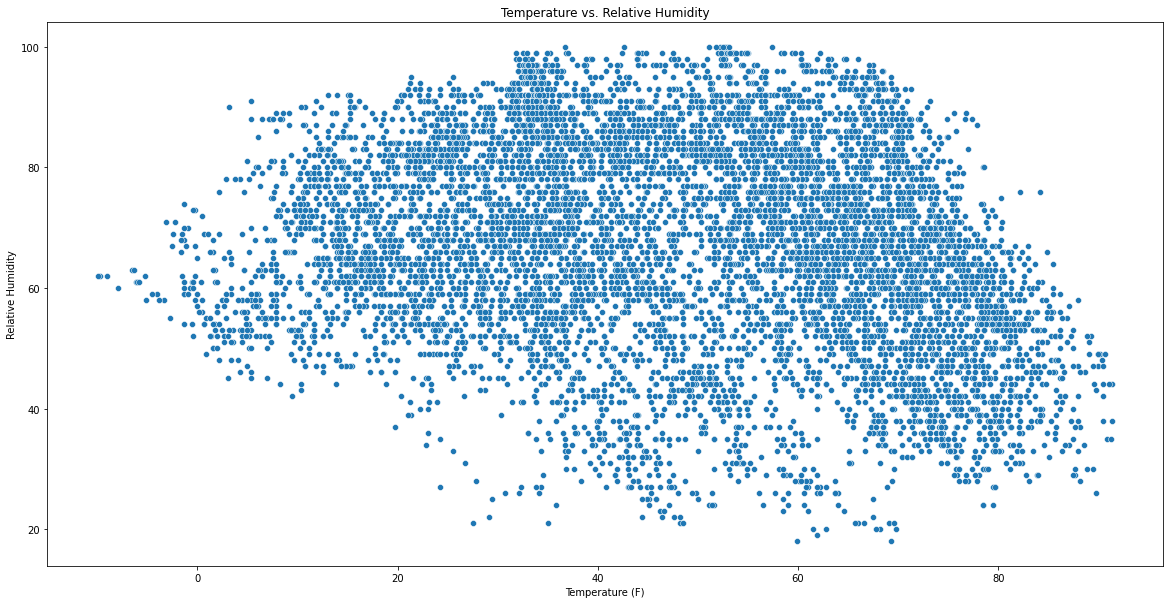

In [85]:
#Write code to generate a scatterplot that compares the temperature against the relative humidity. Size is 20 x 10.
plt.figure(figsize=(20,10));
sns.scatterplot(data=df, x='temp_f', y='relative-humidity');
#formatting
plt.title('Temperature vs. Relative Humidity');
plt.xlabel('Temperature (F)');
plt.ylabel('Relative Humidity');

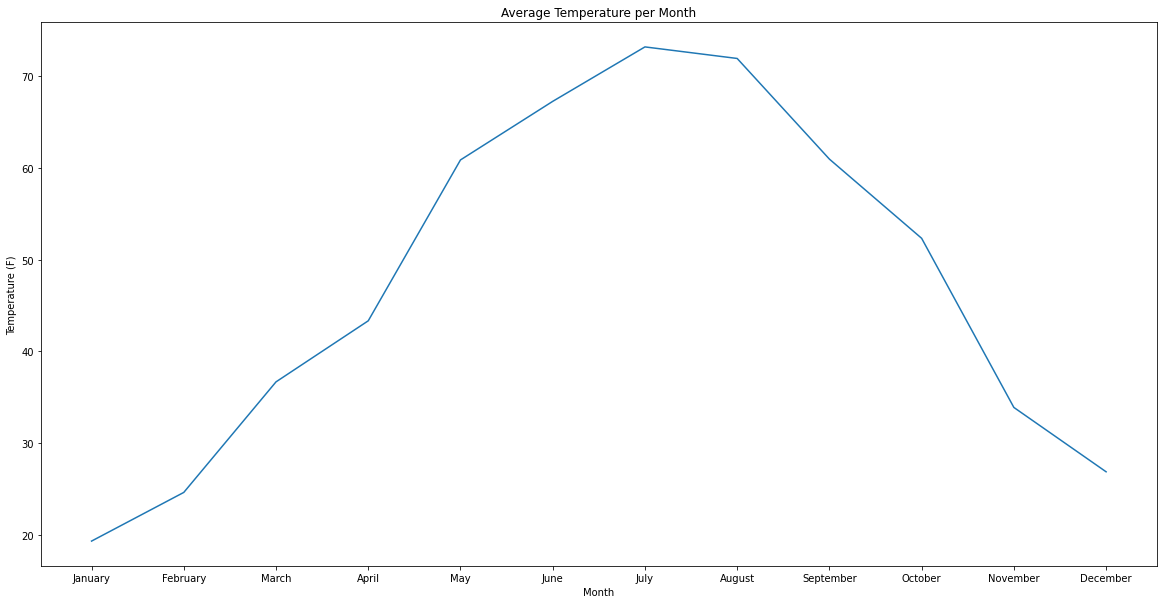

In [86]:
#Write the code to generate a line chart that shows the average temperature per month. Size is 20x10. 
plt.figure(figsize=(20,10));
month = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
temp_avg = np.array([19.31, 24.62, 36.68, 43.34, 60.89, 67.28, 73.22, 71.96, 60.98, 52.34, 33.89, 26.87]);
plt.plot(month,temp_avg);
#formatting
plt.title('Average Temperature per Month');
plt.xlabel('Month');
plt.ylabel('Temperature (F)');

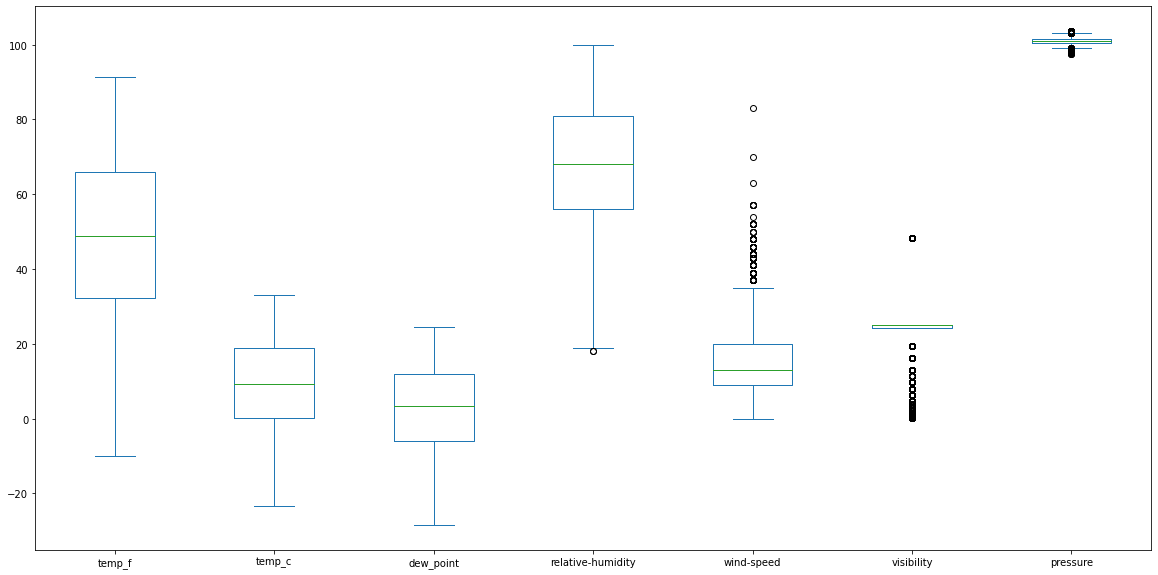

In [89]:
#Write the code to generate a box plot. Size is 20 x 10 
df.plot(kind='box', figsize=(20,10));